## MODELO PREDICTIVO DEL PRECIO DEL ORO  
_Realizado por:_ *RICARDO HINCAPIE EST. PSICOLOGÍA UNIVERSIDAD DEL NORTE*

In [5]:
import pandas as pd
import io
from datetime import datetime
import matplotlib.pyplot as plt 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

In [6]:
dfm = pd.read_csv("C:/Users/ricar/Desktop/Psicología/Coursera/Data science/Bases de datos/Baby steps/Precios del oro/monthly_csv.csv")
dfa = pd.read_csv("C:/Users/ricar/Desktop/Psicología/Coursera/Data science/Bases de datos/Baby steps/Precios del oro/annual_csv.csv")

In [7]:
dfm

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [3]:
dfm.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
#En esta celda se transforma el formato de las fechas de objeto a fecha
dfm['Date'] = pd.to_datetime(dfm['Date'])
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    70 non-null     datetime64[ns]
 1   Price   70 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [5]:
#De esta forma se visualiza cuál formato se le ha dado a la fecha
dfa['Date']

0    1950-12-01
1    1951-12-01
2    1952-12-01
3    1953-12-01
4    1954-12-01
        ...    
65   2015-12-01
66   2016-12-01
67   2017-12-01
68   2018-12-01
69   2019-12-01
Name: Date, Length: 70, dtype: datetime64[ns]

In [6]:
dfm['Date']

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
842   2020-03-01
843   2020-04-01
844   2020-05-01
845   2020-06-01
846   2020-07-01
Name: Date, Length: 847, dtype: datetime64[ns]

In [7]:
#Con este comando se cambia el índice de la tabla, pasa de números a las fechas bajo la etiqueta Date
dfa = pd.DataFrame(dfa['Price']).set_index(dfa['Date'])
dfa.head()

,Price
Date,
1950-12-01,34.72
1951-12-01,34.66
1952-12-01,34.79
1953-12-01,34.85
1954-12-01,35.04


In [8]:
dfm = pd.DataFrame(dfm['Price']).set_index(dfm['Date'])
dfm.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


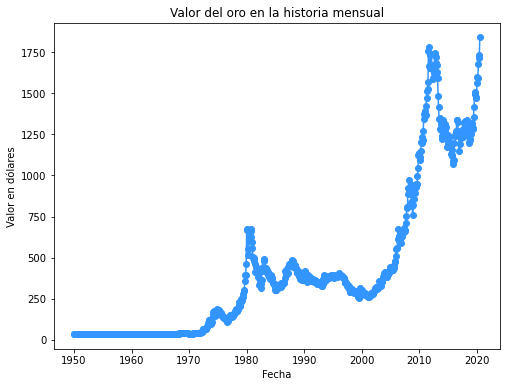

In [9]:
#Graficar el valor del oro por mes
plt.plot(dfm, marker = 'o', linestyle ='-', color = '#3395FF')
plt.title('Valor del oro en la historia mensual')
plt.xlabel('Fecha')
plt.ylabel('Valor en dólares')
plt.gcf().set_size_inches(8, 6)
plt.show()


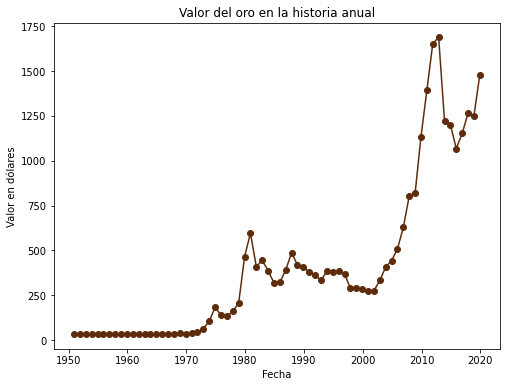

In [10]:
#Graficar el valor del oro por año
plt.plot(dfa, marker = 'o', linestyle ='-', color = '#5E2C0B')
plt.title('Valor del oro en la historia anual')
plt.xlabel('Fecha')
plt.ylabel('Valor en dólares')
plt.gcf().set_size_inches(8, 6)
plt.show()


### INICIO DE LA ETAPA DE ENTRENAMIENTO DEL MODELO

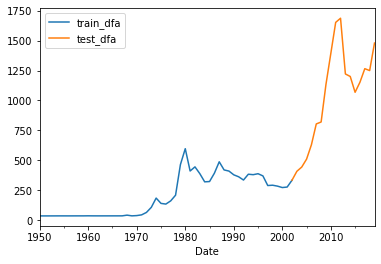

In [51]:
#Establece la variable Tiempo. Timestamp permite realizar operaciones con fechas 
time = pd.Timestamp('2002-12')

#Estos comandos dicen que a cada variable harán parte los datos que se encuentren antes o después de los dos puntos
train_dfa = dfa.loc[:time,['Price']]
test_dfa = dfa.loc[time:,['Price']]

#Estos comandos se encargan de generar el gráfico de los datos. ¿Qué significa 'ax'?
ax = train_dfa.plot()
test_dfa.plot(ax=ax)
plt.legend(['train_dfa', 'test_dfa'])

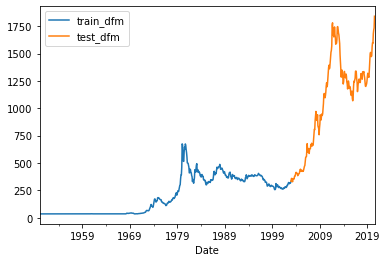

In [52]:
#Establece la variable Tiempo. Timestamp permite realizar operaciones con fechas 
time = pd.Timestamp('2002-12')

#Estos comandos dicen que a cada variable harán parte los datos que se encuentren antes o después de la variable Tiempo
train_dfm = dfm.loc[:time,['Price']]
test_dfm = dfm.loc[time:,['Price']]

#Estos comandos se encargan de generar el gráfico de los datos. ¿Qué significa 'ax'?
ax = train_dfm.plot()
test_dfm.plot(ax=ax)
plt.legend(['train_dfm', 'test_dfm'])

In [53]:
train_dfa.count()

Price    53
dtype: int64

In [54]:
train_dfm.count()

Price    636
dtype: int64

In [55]:
for s in range(0, 10):
    train_dfa['shift_{}'.format(s)] = train_dfa['Price'].shift(s)
    test_dfa['shift_{}'.format(s)] = test_dfa['Price'].shift(s)

train_dfa.head(10)


,Price,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1950-12-01,34.72,34.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-12-01,34.66,34.66,34.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952-12-01,34.79,34.79,34.66,34.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953-12-01,34.85,34.85,34.79,34.66,34.72,NaN,NaN,NaN,NaN,NaN,NaN
1954-12-01,35.04,35.04,34.85,34.79,34.66,34.72,NaN,NaN,NaN,NaN,NaN
1955-12-01,34.97,34.97,35.04,34.85,34.79,34.66,34.72,NaN,NaN,NaN,NaN
1956-12-01,34.90,34.90,34.97,35.04,34.85,34.79,34.66,34.72,NaN,NaN,NaN
1957-12-01,34.99,34.99,34.90,34.97,35.04,34.85,34.79,34.66,34.72,NaN,NaN
1958-12-01,35.09,35.09,34.99,34.90,34.97,35.04,34.85,34.79,34.66,34.72,NaN


In [56]:
for s in range(0, 10):
    train_dfm['shift_{}'.format(s)] = train_dfm['Price'].shift(s)
    test_dfm['shift_{}'.format(s)] = test_dfm['Price'].shift(s)
train_dfm.head(10)

,Price,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1950-01-01,34.73,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-02-01,34.73,34.73,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-03-01,34.73,34.73,34.73,34.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-04-01,34.73,34.73,34.73,34.73,34.73,NaN,NaN,NaN,NaN,NaN,NaN
1950-05-01,34.73,34.73,34.73,34.73,34.73,34.73,NaN,NaN,NaN,NaN,NaN
1950-06-01,34.73,34.73,34.73,34.73,34.73,34.73,34.73,NaN,NaN,NaN,NaN
1950-07-01,34.73,34.73,34.73,34.73,34.73,34.73,34.73,34.73,NaN,NaN,NaN
1950-08-01,34.73,34.73,34.73,34.73,34.73,34.73,34.73,34.73,34.73,NaN,NaN
1950-09-01,34.73,34.73,34.73,34.73,34.73,34.73,34.73,34.73,34.73,34.73,NaN


In [57]:
X_train_dfa = train_dfa.dropna().drop('Price', axis=1)
y_train_dfa = train_dfa.dropna()[['Price']]

X_test_dfa = test_dfa.dropna().drop('Price', axis=1)
y_test_dfa = test_dfa.dropna()[['Price']]

In [58]:
X_train_t = X_train_dfa.values.reshape(X_train_dfa.values.shape[0], 10, 1)
X_test_t = X_test_dfa.values.reshape(X_test_dfa.values.shape[0], 10, 1)
X_train_t.shape

(44, 10, 1)

In [59]:
X_train_dfm = train_dfm.dropna().drop('Price', axis=1)
y_train_dfm = train_dfm.dropna()[['Price']]

X_test_dfm = test_dfm.dropna().drop('Price', axis=1)
y_test_dfm = test_dfm.dropna()[['Price']]

In [60]:
X_train_t_dfm = X_train_dfm.values.reshape(X_train_dfm.values.shape[0], 10, 1)
X_test_t_dfm = X_test_dfm.values.reshape(X_test_dfm.values.shape[0], 10, 1)
X_train_t_dfm.shape

(627, 10, 1)

In [68]:

np.random.seed(54)
python_random.seed(54)
tf.random.set_seed(54)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [66]:
np.random.seed(637)
python_random.seed(637)
tf.random.set_seed(637)

model_dfm = Sequential()
model_dfm.add(LSTM(150, input_shape=(10,1), activation='gelu'))
model_dfm.add(Dense(10))
model_dfm.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_dfm.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1510      
Total params: 92,710
Trainable params: 92,710
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(X_train_t, y_train_dfa, epochs=1000, batch_size=128)

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 88011.9375
Epoch 2/1000
1/1 [==============================] - 0s 23ms/step - loss: 83579.0469
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 79848.3359
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 77387.4766
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 74186.7031
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 68851.6953
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 64463.7266
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 61391.6836
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 55680.7031
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 49103.6523
Epoch 11/1000
1/1 [==============================] - 0s 20ms/step - loss: 40691.3633
Epoch 12/1000
1/1 [==============================] - 0s 16ms/step - loss: 33

In [70]:
history_dfm = model_dfm.fit(X_train_t_dfm, y_train_dfm, epochs=1000, batch_size=128)

Epoch 1/1000
5/5 [==============================] - 5s 40ms/step - loss: 69429.1979
Epoch 2/1000
5/5 [==============================] - 0s 30ms/step - loss: 36188.1367
Epoch 3/1000
5/5 [==============================] - 0s 30ms/step - loss: 14433.0544
Epoch 4/1000
5/5 [==============================] - 0s 31ms/step - loss: 3769.3836
Epoch 5/1000
5/5 [==============================] - 0s 31ms/step - loss: 1393.3998
Epoch 6/1000
5/5 [==============================] - 0s 29ms/step - loss: 1261.0369
Epoch 7/1000
5/5 [==============================] - 0s 30ms/step - loss: 534.9466
Epoch 8/1000
5/5 [==============================] - 0s 31ms/step - loss: 476.8051
Epoch 9/1000
5/5 [==============================] - 0s 30ms/step - loss: 356.3820
Epoch 10/1000
5/5 [==============================] - 0s 30ms/step - loss: 251.1272
Epoch 11/1000
5/5 [==============================] - 0s 33ms/step - loss: 267.2434
Epoch 12/1000
5/5 [==============================] - 0s 30ms/step - loss: 214.3446
Epoc

In [71]:
model.evaluate(X_test_t, y_test_dfa, batch_size=64)

1/1 [==============================] - 1s 1s/step - loss: 26118.8984


26118.8984375

In [72]:
model_dfm.evaluate(X_test_t_dfm, y_test_dfm, batch_size=64)

4/4 [==============================] - 1s 10ms/step - loss: 172.7011


172.70106506347656

In [73]:
y_pred_dfa = model.predict(X_test_t, batch_size=64)
com = pd.DataFrame({'test' : y_test_dfa.Price.values,
             'pred' : y_pred_dfa.reshape(-1)})

In [74]:
y_pred_dfm = model.predict(X_test_t_dfm, batch_size=32)
com_dfm = pd.DataFrame({'test' : y_test_dfm.Price.values,
             'pred' : y_pred_dfm.reshape(-1)})

In [75]:
com


,test,pred
0,1652.725,1837.449463
1,1687.342,1940.073120
2,1221.588,1416.528809
3,1200.440,1375.135254
4,1068.317,881.371948
5,1152.165,1066.622559
6,1265.674,1157.615723
7,1249.887,1149.520752
8,1480.025,1412.662354


In [76]:
com_dfm

,test,pred
0,378.859,353.150787
1,379.093,381.561005
2,390.200,384.632202
3,407.674,382.822510
4,414.495,382.912231
...,...,...
198,1593.764,1523.992676
199,1680.030,1488.940918
200,1715.697,1540.867432
201,1734.032,1579.251221


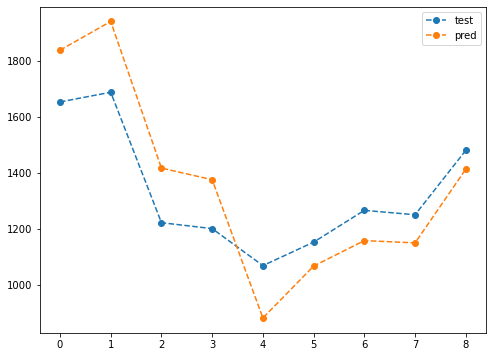

<Figure size 432x288 with 0 Axes>

In [77]:
ax = com.plot(marker='o', linestyle='--')
plt.legend(['test', 'pred'])
plt.gcf().set_size_inches(8, 6)
plt.show()
plt.savefig("Test vs pred 1.png") # save as png

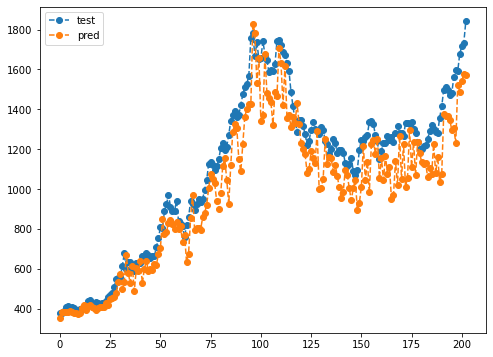

<Figure size 432x288 with 0 Axes>

In [81]:
ax_dfm = com_dfm.plot(marker='o', linestyle='--')
plt.legend(['test', 'pred'])
plt.gcf().set_size_inches(8, 6)
plt.show()
plt.savefig("Test vs pred 2.png") # save as png

In [80]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred_dfa = model.predict(data.reshape(1,-1,1), batch_size=64)
    y_pred_dfa = y_pred_dfa.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred_dfa)
arr.insert(0, y_test_dfa.Price[-1])
arr

[1480.025,
 1412.6628,
 1283.1263,
 1206.8517,
 1095.2811,
 1616.4199,
 1159.7872,
 1250.1615,
 1052.7358,
 906.4721,
 1105.4865]

In [84]:
arr_dfm = []
data_dfm = X_test_t_dfm[-1].reshape(-1)

for i_dfm in range(10):
    y_pred_dfm = model_dfm.predict(data_dfm.reshape(1,-1,1), batch_size=64)
    y_pred_dfm = y_pred_dfm.reshape(-1)[0]
    data_dfm = np.roll(data_dfm,1)
    arr_dfm.append(y_pred_dfm)
arr_dfm.insert(0, y_test_dfm.Price[-1])
arr_dfm

[1840.807,
 1807.496,
 1502.6088,
 1491.0698,
 1459.2522,
 1542.4453,
 1579.3949,
 1600.7605,
 1651.0254,
 1695.4342,
 1736.284]

In [107]:
X = []
X.append(pd.Timestamp('2020-07'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

In [95]:
X_dfm = []
X_dfm.append(pd.Timestamp('2020-07'))
for i_dfm in range(0,10):
    X_dfm.append(pd.Timestamp('202'+str(i_dfm)+'-12'))
X_dfm

[Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

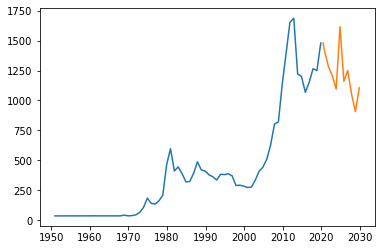

In [108]:
plt.plot(dfa['Price'])
plt.plot(X[:],arr[:])

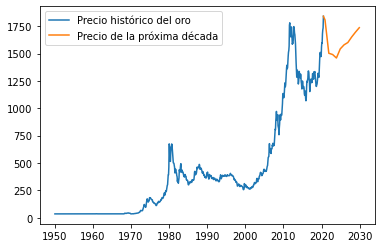

In [109]:
plt.plot(dfm ['Price'])
plt.plot(X_dfm[:],arr_dfm[:])
plt.legend(['Precio histórico del oro', 'Precio de la próxima década'])

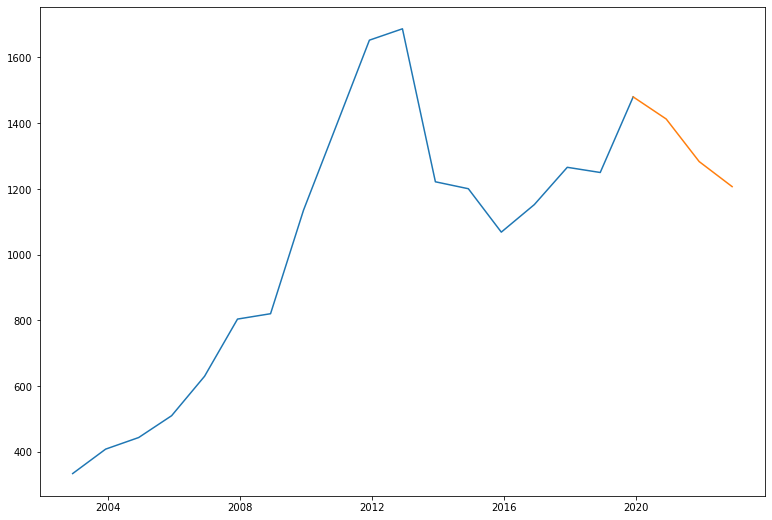

In [99]:
plt.figure(figsize=(13,9))

plt.plot(dfa['Price']['2002-12-01':])

plt.plot(X[:4],arr[:4])

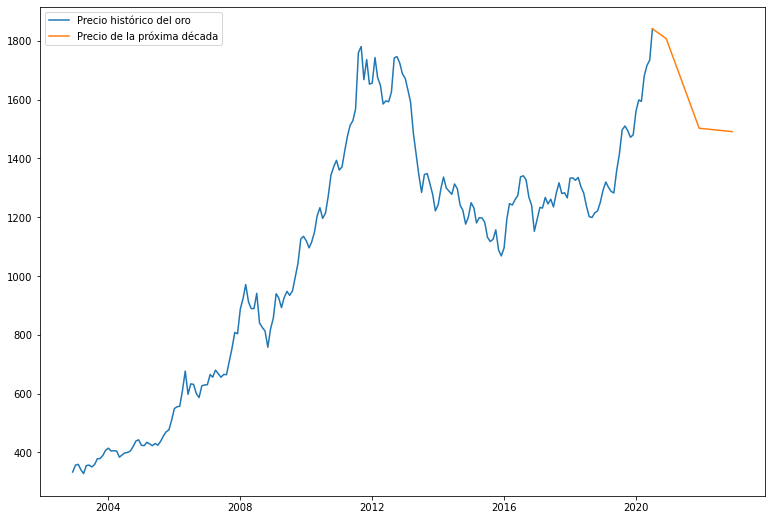

In [104]:
plt.figure(figsize=(13,9))

plt.plot(dfm['Price']['2002-12-01':])

plt.plot(X_dfm[:4],arr_dfm[:4])
plt.legend(['Precio histórico del oro', 'Precio de la próxima década'])

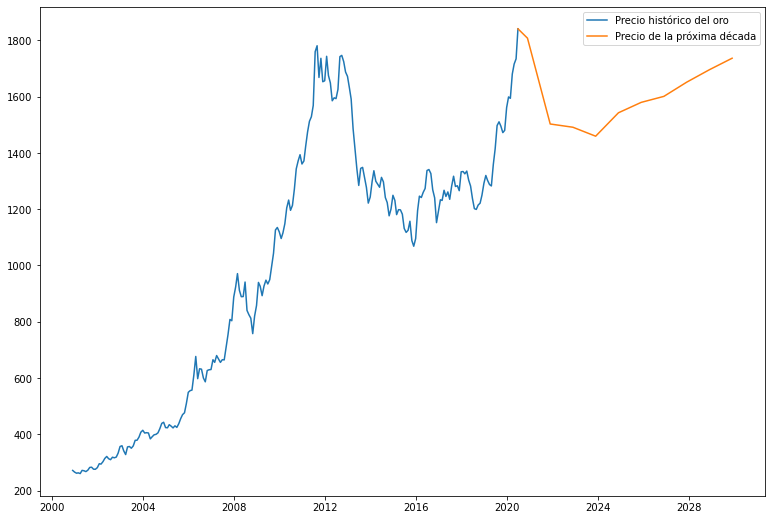

In [106]:
plt.figure(figsize=(13,9))

plt.plot(dfm['Price']['2000-12-01':])

plt.plot(X_dfm[:12],arr_dfm[:12])
plt.legend(['Precio histórico del oro', 'Precio de la próxima década'])